In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
df.shape

(398, 9)

In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
# Convert horsepower objects to integer
df1 = df.copy()
df["horsepower"] = df["horsepower"].replace("?", "0") 
df["horsepower"] = df["horsepower"].astype(int)
df["horsepower"].unique()


array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193,   0, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82], dtype=int64)

In [8]:
# Replacing 0 with Median
df['horsepower'].replace(0,df['horsepower'].median(), inplace=True)

In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
df["car name"].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [11]:
# We can remove car name as it is not needed for prediction
df.drop(['car name'], axis=1, inplace=True)

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [13]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(398, 8)
(391, 8)


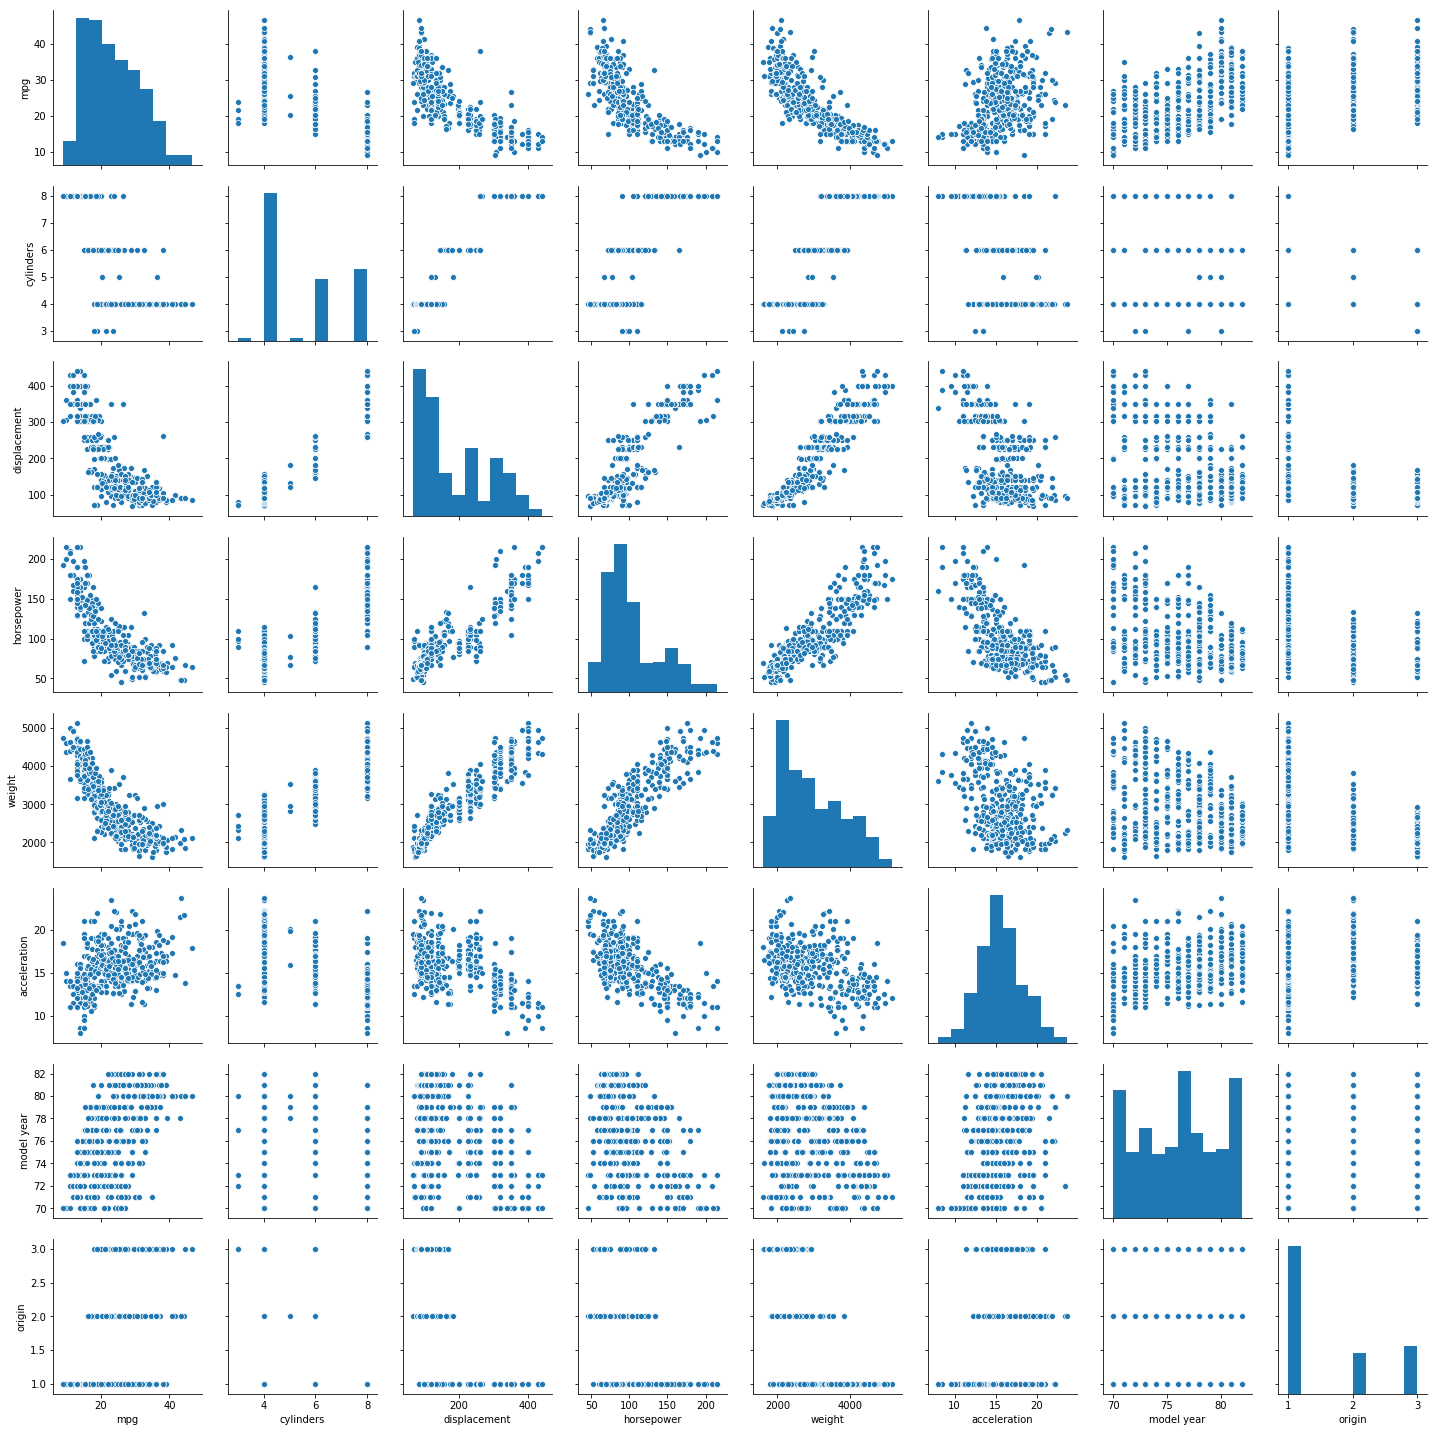

In [14]:
#Lets Check the pairplot using seaborn Library
sns.pairplot(df_final)
plt.show()

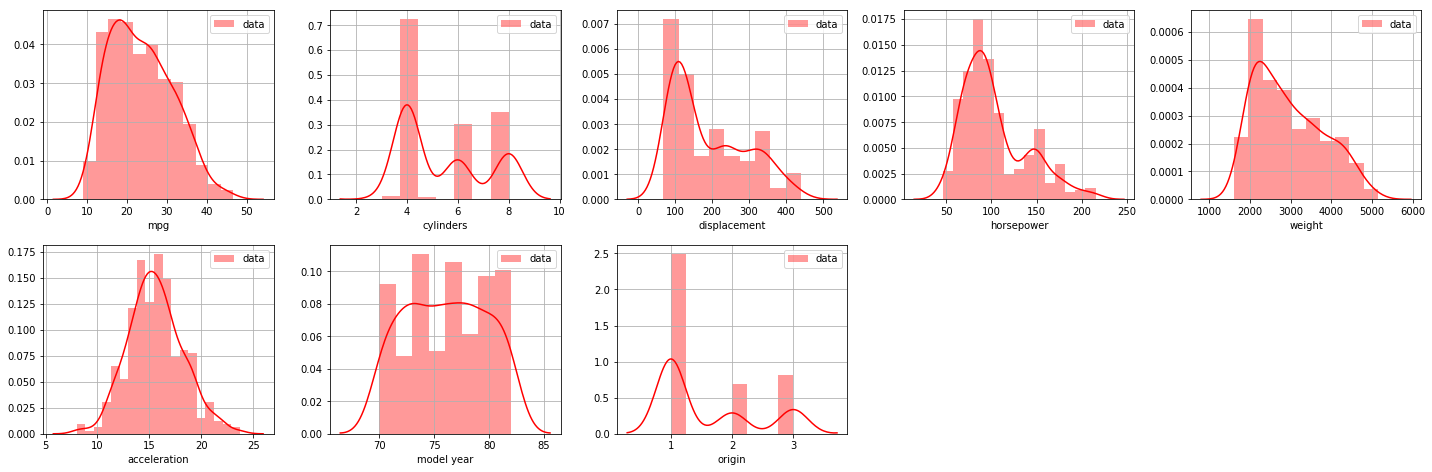

In [15]:
# Plot using distplot
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_final.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df_final[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [16]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

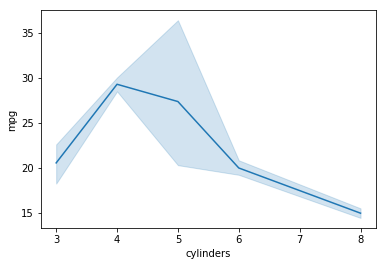

In [17]:
#Lets check the how cylinders is changing with respect to mpg
sns.lineplot(df["cylinders"], df["mpg"])
plt.show()

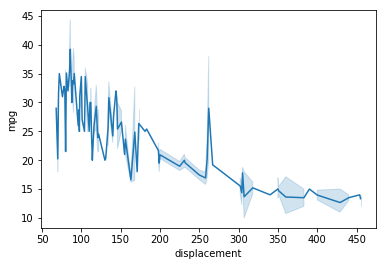

In [18]:

#Lets check how displacement is changing with respect to mpg
sns.lineplot(df["displacement"], df["mpg"])
plt.show()

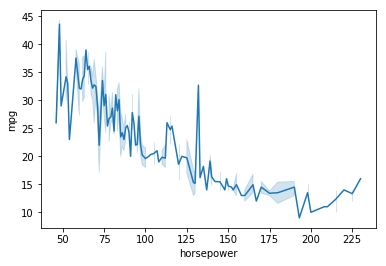

In [19]:
#Lets check how horsepower is changing with respect to mpg
sns.lineplot(df["horsepower"], df["mpg"])
plt.show()

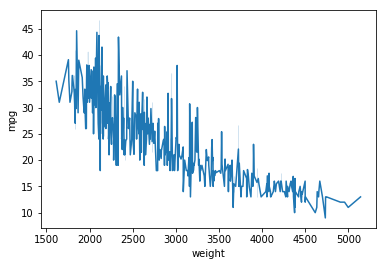

In [20]:
# Lets check how weight is changing with respect to mpg
sns.lineplot(df["weight"], df["mpg"])
plt.show()

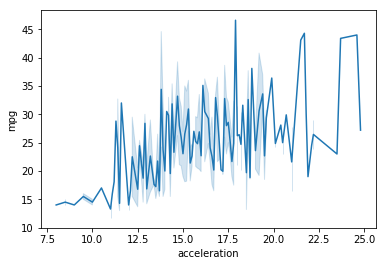

In [21]:
#Lets check how acceleration is changing with respect to mpg
sns.lineplot(df["acceleration"], df["mpg"])
plt.show()

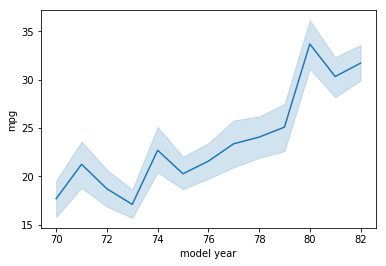

In [22]:
#Lets check how model year is changing with respect to mpg
sns.lineplot(df["model year"], df["mpg"])
plt.show()

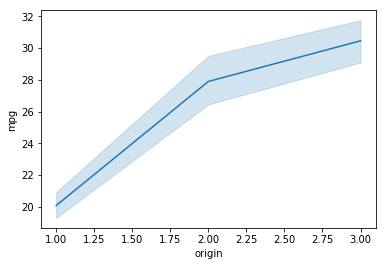

In [23]:
#Lets check how origin is changing with respect to mpg
sns.lineplot(df["origin"], df["mpg"])
plt.show()

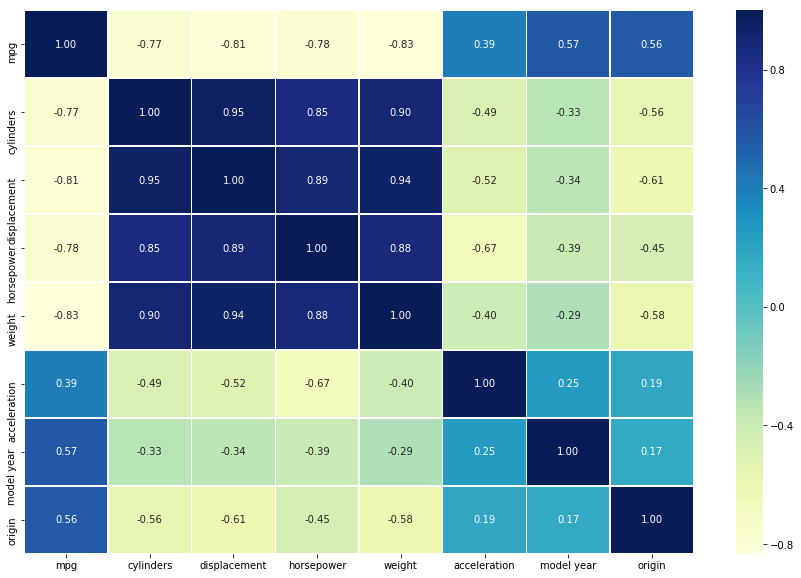

In [24]:
# Let's plot the correlation matrix
corr_matrix = df_final.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

weight, horsepower, displacement,cylinders have high corrilation with mpg

In [25]:
# Lets start modelling
# Split data into X and y
X = df_final.drop("mpg", axis=1)
y = df_final["mpg"].astype(int)

In [26]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=37)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((312, 7), (79, 7), (312,), (79,))

We're going to try below machine learning models:

* LinearRegression
* KNeighborsRegressor
* DecisionTreeRegressor
* RandomForestRegressor
* Lasso
* SVR

In [28]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Lasso":Lasso(),
          "Support Vector Regression": SVR()
          }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.834837905196282,
 'KNN': 0.7304696368248047,
 'Decision Tree': 0.8402819640805741,
 'Random Forest': 0.9034163022213628,
 'Lasso': 0.8205953525508537,
 'Support Vector Regression': 0.7108841669876085}

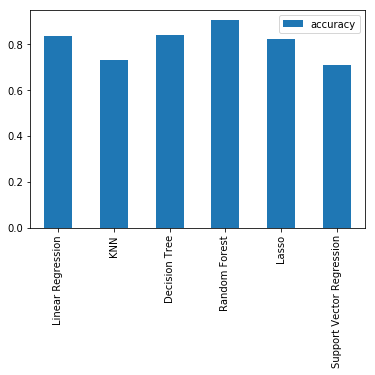

In [30]:
# Compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### By checking the accuracy score we will proceed with Linear Regression, Decision Tree, Random Forest and Lasso

### LinearRegression

In [31]:
def analyse_model(model):    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("cross_val_score: %.2f " % cross_val_score(model, X_train, y_train,cv=5).mean())
    print("R2 model score: %.2f " % model.score(X_test,y_test))
    print("Mean squared error: %.2f " % mean_squared_error(y_test,pred))
    print("mean_absolute_error: %.2f " % mean_absolute_error(y_test,pred))
    print("explained_variance_score: %.2f " % explained_variance_score(y_test,pred)) 
    print("R2_Score: %.2f " % r2_score(y_test,pred))

In [32]:
lreg = LinearRegression()
analyse_model(lreg)

cross_val_score: 0.80 
R2 model score: 0.83 
Mean squared error: 9.31 
mean_absolute_error: 2.35 
explained_variance_score: 0.84 
R2_Score: 0.83 


#### Boost through GradientBoostRegressor

In [42]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = GradientBoostingRegressor(**params)
modelgbr.fit(X_train,y_train)
pred = modelgbr.predict(X_test)
analyse_model(modelgbr)

cross_val_score: 0.84 
R2 model score: 0.90 
Mean squared error: 5.42 
mean_absolute_error: 1.76 
explained_variance_score: 0.91 
R2_Score: 0.90 


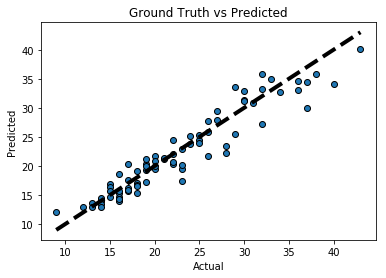

In [43]:
# Lets Visualize the Goodness of the Prediction
fig, ax = plt.subplots()
ax.scatter(y_test, pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

#### Boost through AdaBoostRegressor

In [44]:
ada_reg=AdaBoostRegressor()
add_reg=AdaBoostRegressor(base_estimator=lreg, learning_rate=0.1,n_estimators=10)
analyse_model(ada_reg)

cross_val_score: 0.81 
R2 model score: 0.86 
Mean squared error: 7.70 
mean_absolute_error: 1.92 
explained_variance_score: 0.86 
R2_Score: 0.86 


### DecisionTreeRegressor

In [50]:
dtree = DecisionTreeRegressor()
analyse_model(dtree)

cross_val_score: 0.70 
R2 model score: 0.86 
Mean squared error: 7.78 
mean_absolute_error: 2.09 
explained_variance_score: 0.87 
R2_Score: 0.86 


#### DecisionTreeRegressor Using GridSearchCV

In [53]:
dtgrid = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtgrid.fit(X, y)
print("Score on train dataset={}".format(dtgrid.score(X_test, y_test)))

dtgrid.fit(X_test, y_test)   
print("Score on test dataset={}".format(dtgrid.score(X_test ,y_test)))

Score on train dataset=0.8643567378750228
Score on test dataset=0.9312507753938293


In [65]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtgrid, param_grid, cv=5)

grid_cv_dtm.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [66]:
grid_cv_dtm.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [72]:
grid_cv_dtm.score(X_test, y_test)

0.8926701662022267

In [84]:
# Boost using AdaBoostRegressor
ada_dt_reg=AdaBoostRegressor()
ada_dt_reg=AdaBoostRegressor(base_estimator=dtgrid, learning_rate=0.1)
analyse_model(ada_dt_reg)

cross_val_score: 0.81 
R2 model score: 0.84 
Mean squared error: 8.75 
mean_absolute_error: 2.17 
explained_variance_score: 0.86 
R2_Score: 0.84 


### RandomForestRegressor

In [81]:
rfregressor = RandomForestRegressor()
analyse_model(rfregressor)

cross_val_score: 0.84 
R2 model score: 0.90 
Mean squared error: 5.54 
mean_absolute_error: 1.71 
explained_variance_score: 0.91 
R2_Score: 0.90 


In [91]:
# Tune RandomForestRegressor
# Create a hyperparameter grid for RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# Setup random seed
# np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestRegressor(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [92]:
# Check the best hyperparmaters
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': None}

In [93]:
# Evaluate the randomized search RandomForestRegressor model
rs_rf.score(X_test, y_test)

0.8914241998765221

In [95]:
rf_gss = RandomForestRegressor(n_estimators = 960, max_depth = None, min_samples_split=8, min_samples_leaf = 3 )
analyse_model(rf_gss)

cross_val_score: 0.85 
R2 model score: 0.89 
Mean squared error: 6.16 
mean_absolute_error: 1.77 
explained_variance_score: 0.90 
R2_Score: 0.89 


In [101]:
ada_rfregressor=AdaBoostRegressor()
ada_rfregressor=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1)
ada_rfregressor.fit(X_train,y_train)
ada_pred = ada_rfregressor.predict(X_test)
analyse_model(ada_rfregressor)

cross_val_score: 0.85 
R2 model score: 0.91 
Mean squared error: 5.08 
mean_absolute_error: 1.68 
explained_variance_score: 0.91 
R2_Score: 0.91 


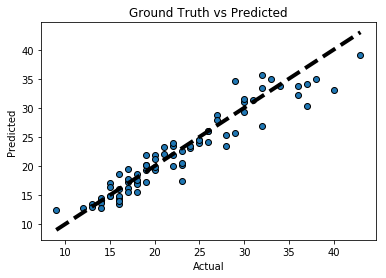

In [102]:
# Lets Visualize the Goodness of the Prediction
fig, ax = plt.subplots()
ax.scatter(y_test, ada_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Lasso

In [103]:
lsreg=Lasso()
analyse_model(lsreg)

cross_val_score: 0.79 
R2 model score: 0.82 
Mean squared error: 10.11 
mean_absolute_error: 2.46 
explained_variance_score: 0.82 
R2_Score: 0.82 


In [105]:
# Lets find out best value for alpha
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X, y)
clf.best_params_

{'alpha': 0.01}

In [106]:
lsreg=Lasso(alpha = 0.01)
analyse_model(lsreg)

cross_val_score: 0.80 
R2 model score: 0.83 
Mean squared error: 9.31 
mean_absolute_error: 2.35 
explained_variance_score: 0.84 
R2_Score: 0.83 


#### Boosting Lasso Regressor

In [110]:
ada_lsreg=AdaBoostRegressor()
add_lsreg=AdaBoostRegressor(base_estimator=lsreg, learning_rate=0.1, n_estimators=10)
analyse_model(lsreg)

cross_val_score: 0.80 
R2 model score: 0.83 
Mean squared error: 9.31 
mean_absolute_error: 2.35 
explained_variance_score: 0.84 
R2_Score: 0.83 


#### Note:- Among all four models ada_rfregressor gives the highest accuracy(91%)

In [111]:
# Lets Save the model as pickle in a file
import pickle
filename = 'auto_mpg.pkl'
pickle.dump(ada_rfregressor, open(filename, 'wb'))

In [113]:
final_model = pickle.load(open(filename,'rb'))
pred = final_model.predict(X_test)
print(r2_score(y_test, pred))

0.9098202766182508
